In [25]:
import cv2
import numpy as np

def extract_empty_table_mask(last_frame_path, mask_output_path):
    """
    Extract the empty table mask from the last frame.

    Parameters:
    - last_frame_path (str): Path to the last frame image.
    - mask_output_path (str): Path to save the extracted mask.
    """
    # Load the last frame image
    last_frame = cv2.imread(last_frame_path)

    # Assuming you manually create or define the mask; here, we use a sample method
    # Convert to grayscale and threshold to create a binary mask
    gray = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 150, 200, cv2.THRESH_BINARY)  # Adjust threshold as needed

    # Save the mask
    cv2.imwrite(mask_output_path, mask)
    return mask

# Example usage
last_frame_path = '/Users/nunofernandes/PycharmProjects/challenge_vc/frames_5_xyz_w/frame_00037.jpg'
mask_output_path = '/Users/nunofernandes/PycharmProjects/challenge_vc/empty_table_mask.jpg'
extract_empty_table_mask(last_frame_path, mask_output_path)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

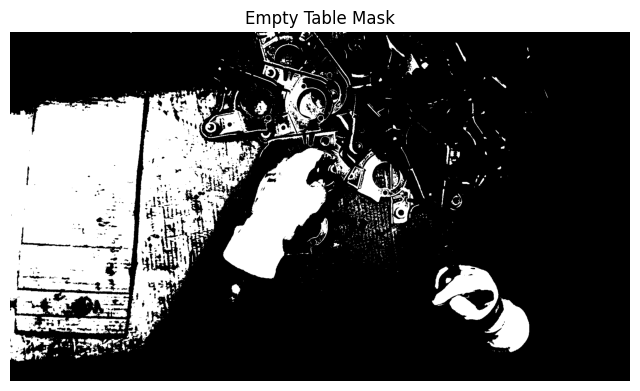

In [26]:
# Display the mask using Matplotlib
import cv2
import matplotlib.pyplot as plt
mask = extract_empty_table_mask(last_frame_path, mask_output_path)
plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray')
plt.title('Empty Table Mask')
plt.axis('off')  # Hide axis
plt.show()

In [27]:
import os

def apply_empty_table_mask(frame_folder, mask_path, output_folder):
    """
    Apply the empty table mask to all frames in the folder.

    Parameters:
    - frame_folder (str): Path to the folder containing frames.
    - mask_path (str): Path to the empty table mask.
    - output_folder (str): Path to save the masked frames.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    for filename in os.listdir(frame_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            frame_path = os.path.join(frame_folder, filename)
            frame = cv2.imread(frame_path)

            # Apply the mask
            masked_frame = cv2.bitwise_and(frame, frame, mask=mask)

            # Save the masked frame
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, masked_frame)

# Example usage
frame_folder = '/Users/nunofernandes/PycharmProjects/challenge_vc/masked'
output_folder = '/Users/nunofernandes/PycharmProjects/challenge_vc/masked_'
apply_empty_table_mask(frame_folder, mask_output_path, output_folder)
